In [ ]:
# Fireflies Synchronization

''' @Author: Sanyukta Suman 
    Purpose: To design a model of firefly synchronization in 2 dimension
    For now my purpose is to just design a model.
    also analyze firefly response to the stimulus.
    
    
    Steps to design a model:
    1. Define equation
    2. Find the equilibrium point
    3. Fixed point
    4. Stability
    5. Ploting a graph
    6. trajectories and phases
    
'''

In [ ]:
# Step 1: Defining Equations
''' I am using a simplified model found in the chapter on firefly
    synchronization in Strogatz.
    He examines a simple model of how firefly flashing rythm responds
    to flashing stimuli.
    
    Let the Phase of the firefly flashing be given by theta(t) where theta=0 corresponds to the instant 
    when a flash is emitted.
    Assume this phase is 2pi periodic so that theta=2pi*n, where n= any integer
    
    Then theta_dot=w -->represets its natural frequency
    
    Now let there be a stimulus with 2pi periodic phase uptheta,
    uptheta=0 corresponds to the instant the stimulus flashes
    frequency----> uptheta=omega
    
    Therefore, parameters will be w, omega for now.
    
    We know that,
    if the stimulus flashes before the firefly---> flirefly will speed up in attempt to synchronize.
    if the stimulus flashes after the firefly----> firefly slows down.
    
    The simple model will be 
                    uptheta_dot=w+Asin(uptheta-theta)
                    
                    where A is the resetting strength of the firefly.
                    This is a measure of the firefly's ability to change its instataenous frequency in response to a stimulus.
                    which also implies A>0. 
                    
                    From this equation, if 0<uptheta-theta<pi----> stimulus is ahead of the firefly
                    then upteta_dot>w --->firefly speeds up
                    Similarly, if -pi<uptheta-theta<0----> stimulus is behind the firefly
                    then optheta_dot<w---> firefly slows down
                    
                    Let phi=uptheta-theta---> denotes phase difference between the stimulus and firefly.
                    
                    Here theta, uptheta and phi are three are in 2pi periodic.
                    
    
    
    
    
    '''

In [ ]:
#Entertainment
'''Entertainemnt is a term to describe the situation in which the firefly is able to 
match its instatntaneous frequency to that of the stimulus.

if the entertainemnet occurs, the phase difference (phi), approaches a fixed point.
If this constant is 0, we say firefly is syncronized.

if the constant is not equal to zero, we say firefly is phase-locked to the stimulus.

we can plot phi vs time in order to classiyf the behaviour

'''

In [2]:
import numpy as np
from math import cos, exp, pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')


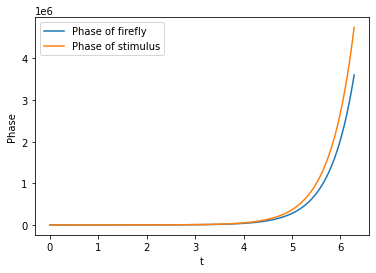

In [2]:
#Graph for Phase of firefly(theta_dot) and phase of stimulus(uptheta_dot) 

#first define initial conditions and parameters 
w0=12.5664
omega0=16.5664
c0=0
n=2
#Define time parameter 0 to 2 pi
t=np.linspace(0,2*np.pi,1000)

#Fuction for natural frequency of firefly

def theta_dot(w,t):
    w0=w
    theta_dot=n*w
    return theta_dot

#Function for frequency for a stimulus
def uptheta_dot(omega,t):
    omega0=omega
    uptheta_dot=n*omega
    return uptheta_dot

#applying in both the functions 
y2=odeint(theta_dot,w0,t)
y3=odeint(uptheta_dot,omega0,t)



plt.plot(t,y2,label='Phase of firefly')
plt.plot(t,y3,label='Phase of stimulus')
#plt.plot(t,y4,label='Phase difference')
plt.ylabel('Phase')
plt.xlabel('t')
plt.legend()
plt . savefig ('Phase.png')
plt.show()





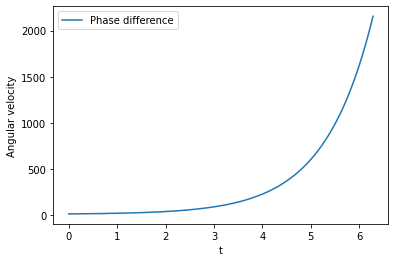

<Figure size 432x288 with 0 Axes>

In [4]:
#Function for Phase difference (uptheta-theta)
t1=np.linspace(0,2*np.pi,1000)
def p(omega,t1,w,c):
    dpdt=omega-w
    return dpdt

y4=odeint(p,omega0,t1,args=(w0,c0))

plt.plot(t1,y4,label='Phase difference')
plt.ylabel('Angular velocity')
plt.xlabel('t')
plt.legend()
plt.show()
plt . savefig ('ExpGrowth.png')



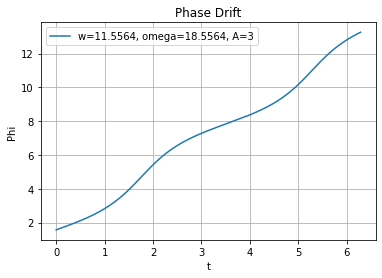

In [3]:

#define fucntion for dpdt
A=1
w0=12.5664
omega0=14.6121
omega0=14.6121
phi0=1.5708

#y0=[phi0,w0,omega0]
t=np.linspace(0,2*np.pi,1000)

def phi_dot(phi,t,w0,omega0):
    count=0
    phi0=phi
    phi_dot=omega0-w0-(A* np.sin(phi))
    phi1=phi
    return phi_dot

sol4=odeint(phi_dot,phi0,t,args=(w0,omega0))

plt.plot(t,sol4,label='w=11.5564, omega=18.5564, A=3')
plt.title('Phase Drift')
plt.ylabel('Phi')
plt.xlabel('t')
plt.legend()
plt.grid(True)
#plt . savefig ('phaselock.png')
plt.show()






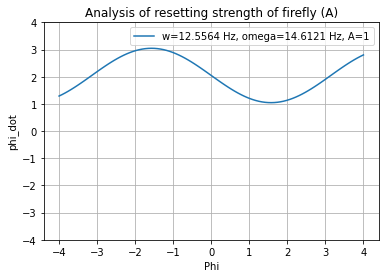

In [11]:
#fixed point analysis and stability
#Plotting graph phi vs phi_dot
phi=np.linspace(-4,4,100)
phi_dot=omega0-w0-(A* np.sin(phi))
plt.plot(phi,phi_dot,label='w=12.5564 Hz, omega=14.6121 Hz, A=1')
plt.autoscale(enable=True)
plt.grid(True)
plt.title('Analysis of resetting strength of firefly (A)')
plt.xlabel('Phi')
plt.ylabel('phi_dot')
plt.legend()
#plt.set_ylim(-.5, 1.5)
plt.ylim(-4, 4)
plt . savefig ('flock.png')
plt.show()


In [12]:
print (phi)

1.5708


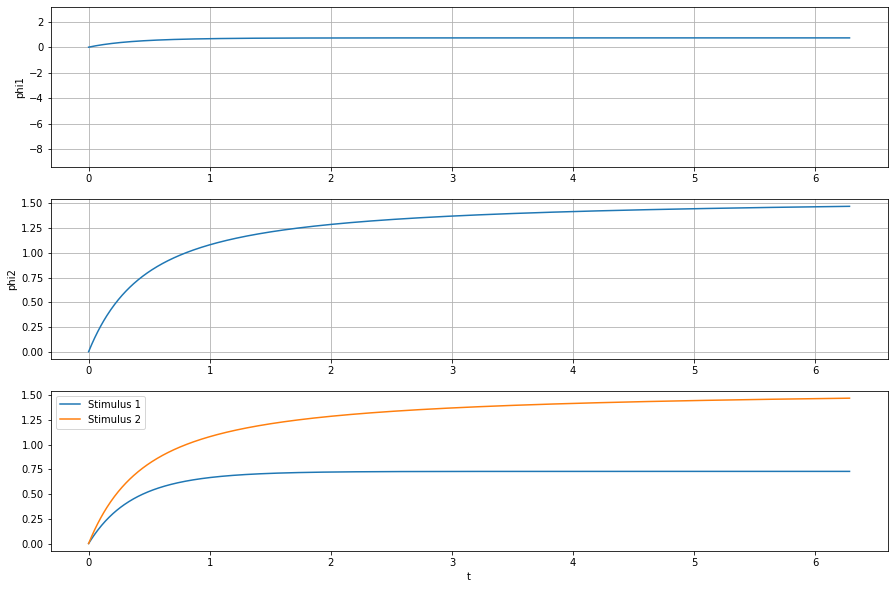

In [49]:
#Simulation
#Define Intial parameters
w0=12.5664 #natural frequency of firefly
omega10=14.5664 #frequency of stimulus 1
omega20=15.5664 #frequency of stimulus 2
A=3 #resetting strength of firefly - its ability to change its natural frequency to match that of stimulus
t=np.linspace(0,2*np.pi,1000)
phi10=0
phi20=0
y0=[phi10,phi20]
def dydt(y,t):
    phi1,phi2=y
    dydt1=omega10-w0-A*np.sin(phi1)
    dydt2=omega20-w0-A*np.sin(phi2)
    test=[dydt1,dydt2]
    return test
sols=odeint(dydt,y0,t)

fig,(ax1, ax2, ax3)=plt.subplots(nrows=3,ncols=1,figsize=(15,10))

ax1 . plot (t,sols[:,0],label='Stimulus 1')
ax1.set_ylabel('phi1')
ax1.set_ylim(-3*np.pi, np.pi)
ax1.grid(True)

ax2 . plot (t,sols[:,1],label='Stimulus 2')
ax2.set_ylabel('phi2')
ax2.grid(True)

ax3 . plot (t,sols[:,0],label='Stimulus 1')
ax3 . plot (t,sols[:,1],label='Stimulus 2')
ax2.set_ylabel('phi2')
ax2.grid(True)


#plt.ylim(-3*np.pi, np.pi)

plt.xlabel('t')
plt.legend()
plt . savefig ('twostimuli.png')
plt.show()



    
    

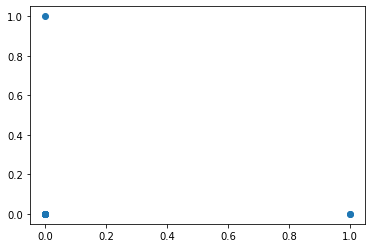

In [158]:
plt.scatter(y,z)
plt.show()

In [176]:
import matplotlib.cm as cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=-14, vmax=86)
f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('RdYlGn'))

def f2hex(f2rgb, f):
    rgb = f2rgb.to_rgba(f)[:3]
    return '#%02x%02x%02x' % tuple([255*fc for fc in rgb])
